In [1]:
import glob
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors, Word2Vec, FastText
from compute_accuracy import compute_accuracy
pd.set_option('display.max_colwidth', None)

In [2]:
def update_if_defined(d, key, value):
    if value:
        d[key] = value

def load_by_arch(file, arch):
    match arch:
        case 'w2v':
            model = Word2Vec.load(file)
        case 'ft':
            model = FastText.load(file)
        case v:
            raise Exception(f'Unknown model arch: {v}')
    return model

metadataset = []
for file in sorted(glob.glob("*.model")):
    print(file)
    metadata = {'mname': file.removesuffix('.model')}
    parts = file.split('-')
    for part in parts:
        update_if_defined(metadata, 'arch', re.search(r'(w2v|ft)?', part).group(1))
        update_if_defined(metadata, 'sg', re.search(r'(?:sg([0-9]*)?)?', part).group(1))
        update_if_defined(metadata, 'dim', re.search(r'(?:d([0-9]*)?)?', part).group(1))
        update_if_defined(metadata, 'window', re.search(r'(?:w([0-9]*)?)?', part).group(1))
        update_if_defined(metadata, 'min_word', re.search(r'(?:min([0-9]*)?)?', part).group(1))
        update_if_defined(metadata, 'ns_exp', re.search(r'(?:nse([0-9\.]*)?)?', part).group(1))
        update_if_defined(metadata, 'sample', re.search(r'(?:smp([0-9\.]*)?)?', part).group(1))
        update_if_defined(metadata, 'epochs', re.search(r'(?:ep([0-9]*)?)?', part).group(1))
        update_if_defined(metadata, 'descr', re.search(r'(?:descr_([^-\.]*)?)?', part).group(1))
        
    model = load_by_arch(file, metadata['arch'])
    
    assert int(metadata['sg']) == model.sg
    assert int(metadata['dim']) == model.vector_size
    assert int(metadata['window']) == model.window
    assert int(metadata['min_word']) == model.min_count
    assert float(metadata['ns_exp']) == model.ns_exponent
    assert float(metadata['sample']) == model.sample
    assert int(metadata['epochs']) == model.epochs
    
    metadataset.append(metadata)

df = pd.DataFrame(metadataset).fillna({'descr':''})
df

ft-sg0-d100-w3-min10-nse0.75-smp0.001-ep100.model
w2v-sg0-d100-w3-min10-nse0.1-smp0.00001-ep100.model
w2v-sg0-d100-w3-min10-nse0.1-smp0.00001-ep500.model
w2v-sg0-d100-w3-min10-nse0.1-smp0.001-ep100.model
w2v-sg0-d100-w3-min10-nse0.75-smp0.00001-ep100.model
w2v-sg0-d100-w3-min10-nse0.75-smp0.0001-ep100.model
w2v-sg0-d100-w3-min10-nse0.75-smp0.001-ep100-descr_only_nouns.model
w2v-sg0-d100-w3-min10-nse0.75-smp0.001-ep100.model
w2v-sg0-d100-w3-min10-nse0.75-smp0.001-ep200.model
w2v-sg0-d100-w3-min10-nse0.75-smp0.001-ep500.model
w2v-sg0-d100-w3-min100-nse0-smp10000-ep200-descr_only_nouns.model
w2v-sg0-d100-w3-min100-nse0-smp10000-ep200.model
w2v-sg0-d100-w3-min30-nse0-smp10000-ep300.model
w2v-sg0-d100-w4-min100-nse0-smp10000-ep200.model
w2v-sg0-d200-w3-min10-nse0.75-smp0.001-ep100.model
w2v-sg1-d100-w3-min10-nse0.75-smp0.001-ep100.model


,mname,arch,sg,dim,window,min_word,ns_exp,sample,epochs,descr
0,ft-sg0-d100-w3-min10-nse0.75-smp0.001-ep100,ft,0,100,3,10,0.75,0.001,100,
1,w2v-sg0-d100-w3-min10-nse0.1-smp0.00001-ep100,w2v,0,100,3,10,0.1,0.00001,100,
2,w2v-sg0-d100-w3-min10-nse0.1-smp0.00001-ep500,w2v,0,100,3,10,0.1,0.00001,500,
3,w2v-sg0-d100-w3-min10-nse0.1-smp0.001-ep100,w2v,0,100,3,10,0.1,0.001,100,
4,w2v-sg0-d100-w3-min10-nse0.75-smp0.00001-ep100,w2v,0,100,3,10,0.75,0.00001,100,
5,w2v-sg0-d100-w3-min10-nse0.75-smp0.0001-ep100,w2v,0,100,3,10,0.75,0.0001,100,
6,w2v-sg0-d100-w3-min10-nse0.75-smp0.001-ep100-descr_only_nouns,w2v,0,100,3,10,0.75,0.001,100,only_nouns
7,w2v-sg0-d100-w3-min10-nse0.75-smp0.001-ep100,w2v,0,100,3,10,0.75,0.001,100,
8,w2v-sg0-d100-w3-min10-nse0.75-smp0.001-ep200,w2v,0,100,3,10,0.75,0.001,200,
9,w2v-sg0-d100-w3-min10-nse0.75-smp0.001-ep500,w2v,0,100,3,10,0.75,0.001,500,


In [3]:
def accuracy(name):
    wv = KeyedVectors.load_word2vec_format(name + '.vectors', binary=False)
    return compute_accuracy(lambda w1, w2: wv.similarity(w1, w2), log_failed_cases=False) 

df['accuracy'] = df.mname.apply(accuracy)

In [4]:
df.drop('mname', axis=1).sort_values(by='accuracy', ascending=False)

,arch,sg,dim,window,min_word,ns_exp,sample,epochs,descr,accuracy
9,w2v,0,100,3,10,0.75,0.001,500,,0.869919
12,w2v,0,100,3,30,0,10000,300,,0.865854
8,w2v,0,100,3,10,0.75,0.001,200,,0.853659
11,w2v,0,100,3,100,0,10000,200,,0.853659
2,w2v,0,100,3,10,0.1,0.00001,500,,0.849593
13,w2v,0,100,4,100,0,10000,200,,0.845528
10,w2v,0,100,3,100,0,10000,200,only_nouns,0.841463
15,w2v,1,100,3,10,0.75,0.001,100,,0.841463
5,w2v,0,100,3,10,0.75,0.0001,100,,0.829268
14,w2v,0,200,3,10,0.75,0.001,100,,0.829268


In [ ]:
with open('losses.json') as f:
    losses_mapping = json.load(f)

PLOTS_PER_ROW = 3
fig, ax = plt.subplots(len(df.index) // PLOTS_PER_ROW + 1, PLOTS_PER_ROW, figsize=(20,30))
fig.suptitle('X - epoch, Y - loss', fontsize=16)
fig.subplots_adjust(top=0.93, hspace=0.3)
for index, row in df.iterrows():
    losses = losses_mapping[row.mname]
    ax[index // PLOTS_PER_ROW, index % PLOTS_PER_ROW].plot(losses)
    ax[index // PLOTS_PER_ROW, index % PLOTS_PER_ROW].set_title(row.mname)

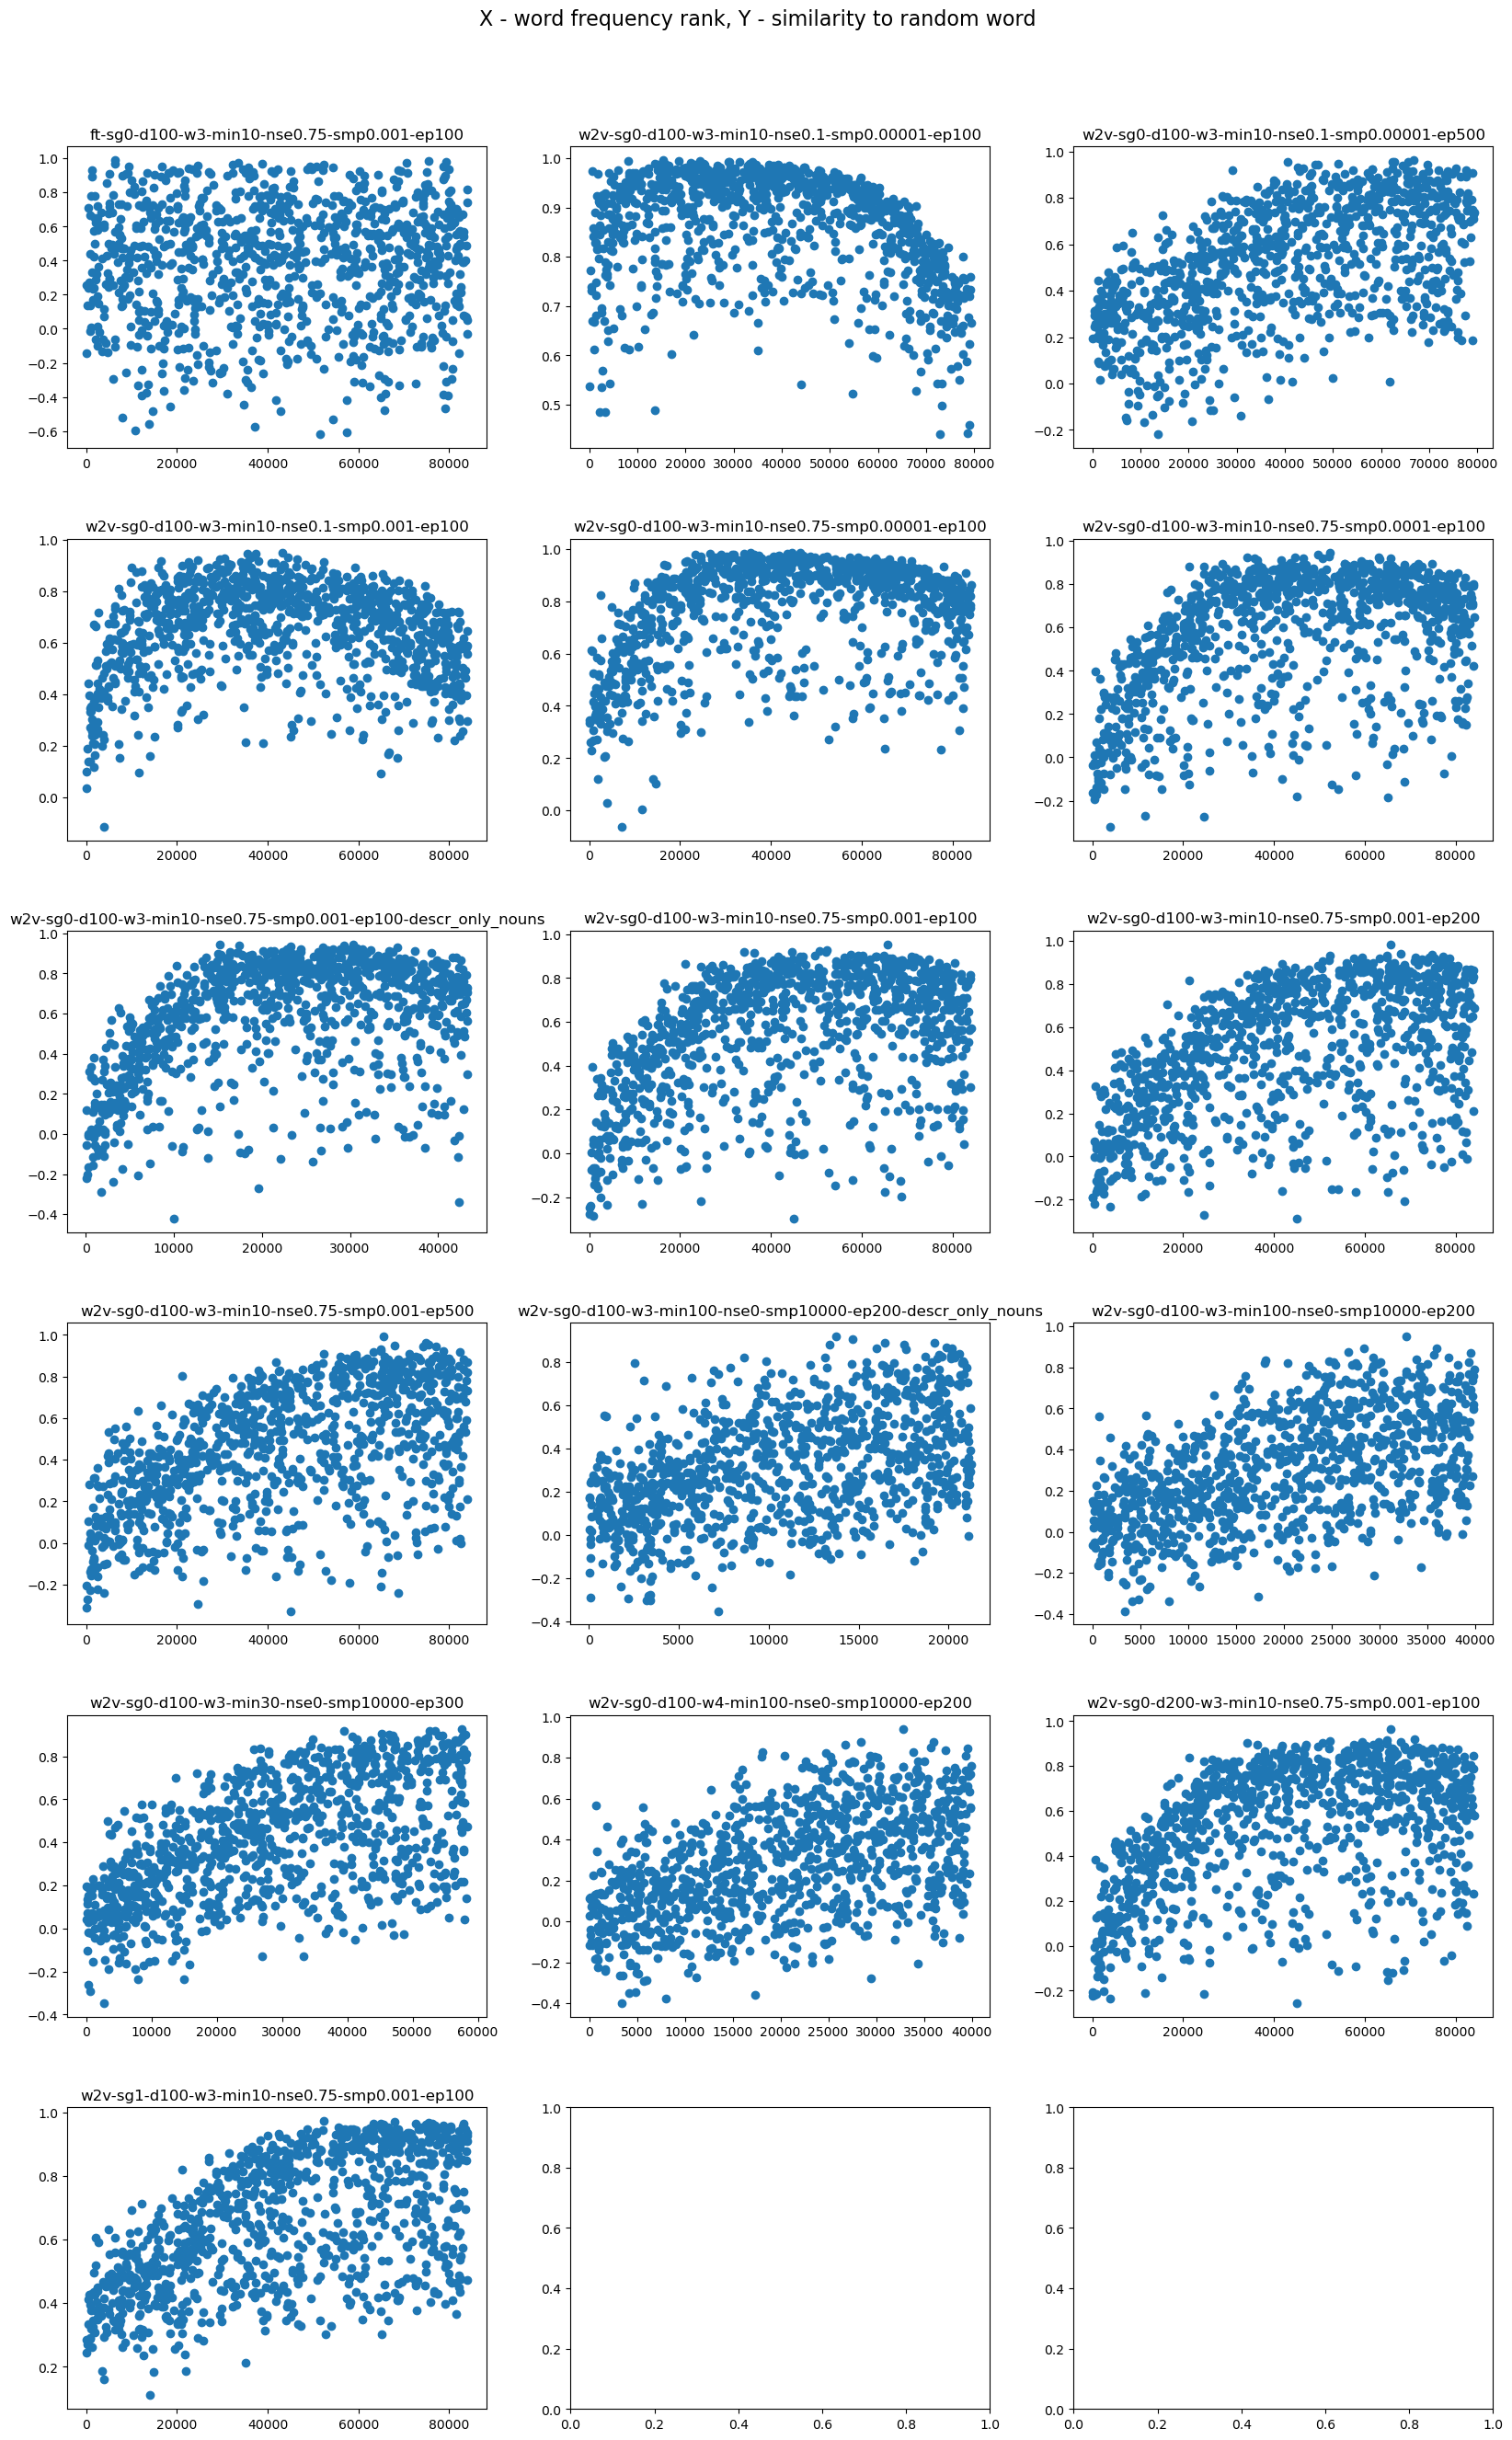

In [6]:
def similarity_to_random_words(model):
    np.random.seed(0)
    vocab_size = len(model.wv.index_to_key)
    pairs = [(np.random.randint(vocab_size), np.random.randint(vocab_size)) for _ in range(1000)]
    similarities = [model.wv.similarity(model.wv.index_to_key[p[0]], model.wv.index_to_key[p[1]]) for p in pairs]
    return [p[0] for p in pairs], similarities

def plot_similarities_to_random_word(name, arch):
    model = load_by_arch(name + '.model', arch)
    word_indices, similarities = similarity_to_random_words(model)
    plt.scatter(word_indices, similarities)
    plt.xlabel('Rank by frequency')
    plt.ylabel('Similarity to a random word')
    plt.show()

PLOTS_PER_ROW = 3
fig, ax = plt.subplots(len(df.index) // PLOTS_PER_ROW + 1, PLOTS_PER_ROW, figsize=(20,30))
fig.suptitle('X - word frequency rank, Y - similarity to random word', fontsize=16)
fig.subplots_adjust(top=0.93, hspace=0.3)
for index, row in df.iterrows():
    model = load_by_arch(row.mname + '.model', row.arch)
    word_indices, similarities = similarity_to_random_words(model)
    ax[index // PLOTS_PER_ROW, index % PLOTS_PER_ROW].scatter(word_indices, similarities)
    ax[index // PLOTS_PER_ROW, index % PLOTS_PER_ROW].set_title(row.mname)

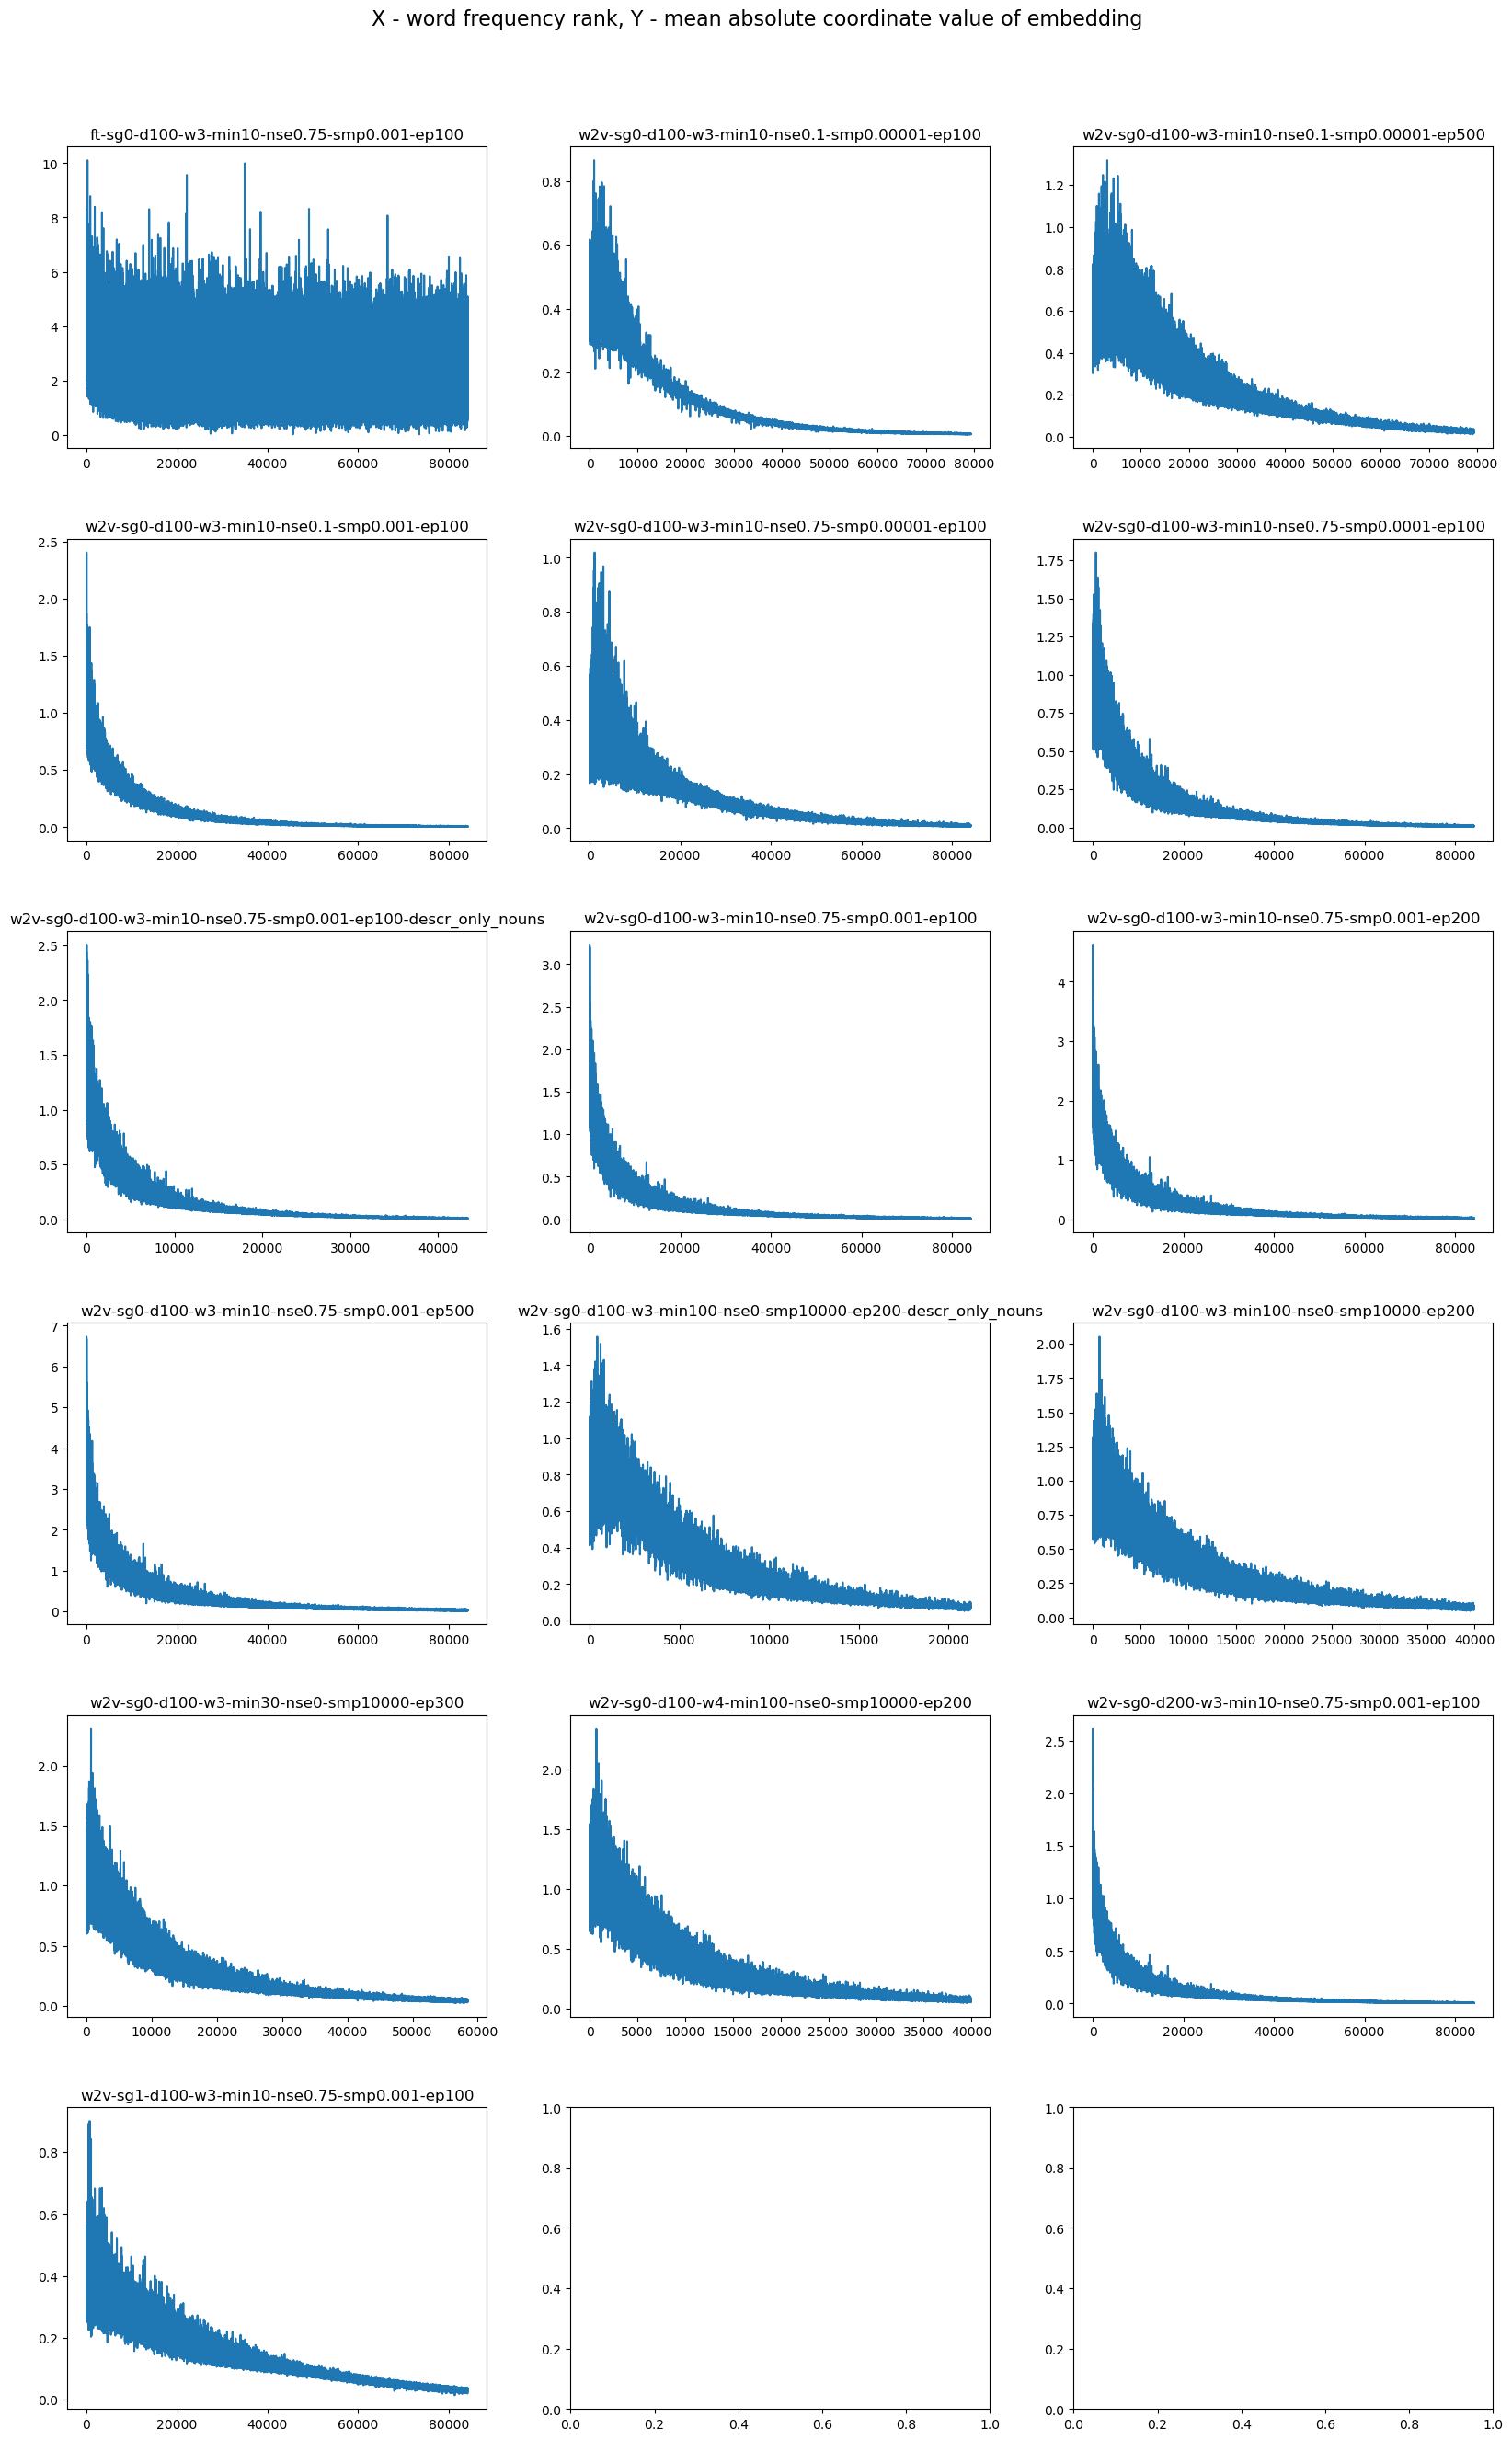

In [7]:
PLOTS_PER_ROW = 3
fig, ax = plt.subplots(len(df.index) // PLOTS_PER_ROW + 1, PLOTS_PER_ROW, figsize=(20,30))
fig.suptitle('X - word frequency rank, Y - mean absolute coordinate value of embedding', fontsize=16)
fig.subplots_adjust(top=0.93, hspace=0.3)
for index, row in df.iterrows():
    model = load_by_arch(row.mname + '.model', row.arch)
    coord_abs_values = [np.mean(np.abs(model.wv.get_vector(word))) for word in model.wv.index_to_key]
    ax[index // PLOTS_PER_ROW, index % PLOTS_PER_ROW].plot(coord_abs_values)
    ax[index // PLOTS_PER_ROW, index % PLOTS_PER_ROW].set_title(row.mname)
plt.show()

In [8]:
model = Word2Vec.load("w2v-sg1-d100-w3-min10-nse0.75-smp0.001-ep100.model")
print(model.min_count)
print(model.ns_exponent)
print(model.sample)
print(model.epochs)
print(model.sg)
print(model.vector_size)
model.get_latest_training_loss()

10
0.75
0.001
100
1
100


0.0

In [9]:
model.wv.get_vecattr('пульсар', 'count')

101